<a href="https://colab.research.google.com/github/m-sakh/tsef-drone-analysis-project/blob/main/drone-data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [7]:
#Downloading data
df = pd.read_csv("drone_data_1.csv", header=1)
df.head()

,Unnamed: 0,Model,Battery Capacity (mAh),Weight (g),Number of Motors,Max Flight Time (min),Source
0,NaN,DJI Mini 4 Pro,2590,249.0,4,34,https://www.dji.com/mini-4-pro/specs
1,NaN,DJI Mini 5 Pro,2788,249.9,4,36,https://www.techradar.com/reviews/dji-mini-5-pro
2,NaN,DJI Air 2S,3500,595.0,4,31,https://pilotinstitute.com/best-consumer-drones/
3,NaN,Autel EVO Lite+,6175,835.0,4,40,https://shop.autelrobotics.com/products/drones...
4,NaN,Autel EVO Nano+,2250,249.0,4,28,https://shop.autelrobotics.com/products/drones...


In [8]:
#Ensuring data is correctly formatted
print(df.info())
print(df.describe())
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              0 non-null      float64
 1   Model                   15 non-null     object 
 2   Battery Capacity (mAh)  15 non-null     int64  
 3   Weight (g)              15 non-null     float64
 4   Number of Motors        15 non-null     int64  
 5   Max Flight Time (min)   15 non-null     int64  
 6   Source                  15 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 972.0+ bytes
None
       Unnamed: 0  Battery Capacity (mAh)   Weight (g)  Number of Motors  \
count         0.0               15.000000    15.000000         15.000000   
mean          NaN             3673.533333   651.193333          4.133333   
std           NaN             1479.900135   466.851357          0.516398   
min           NaN             2250.000000   2

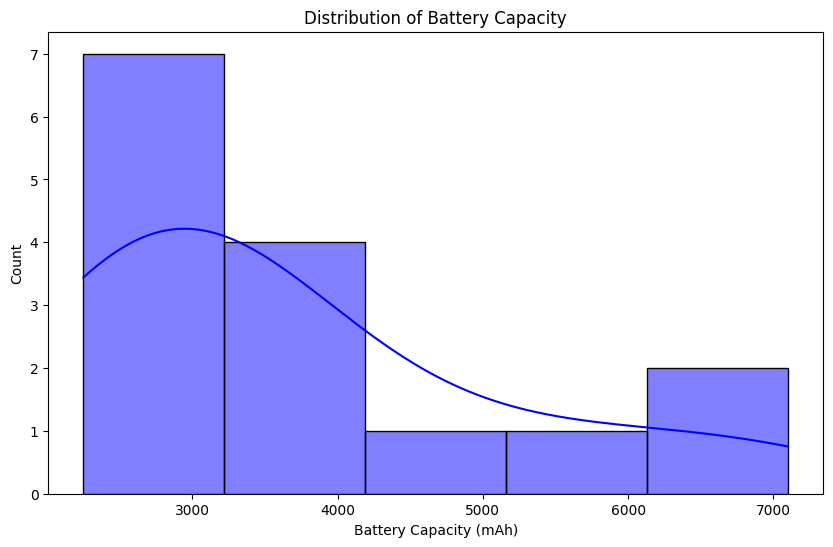

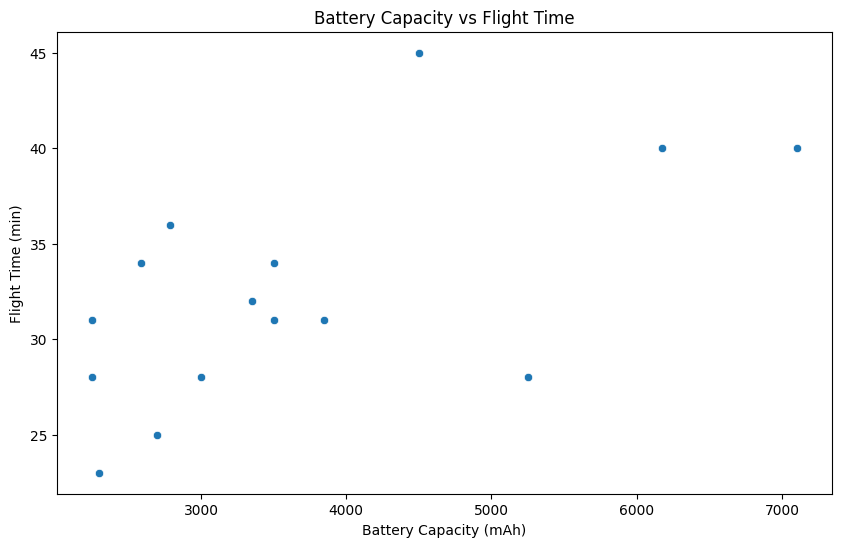

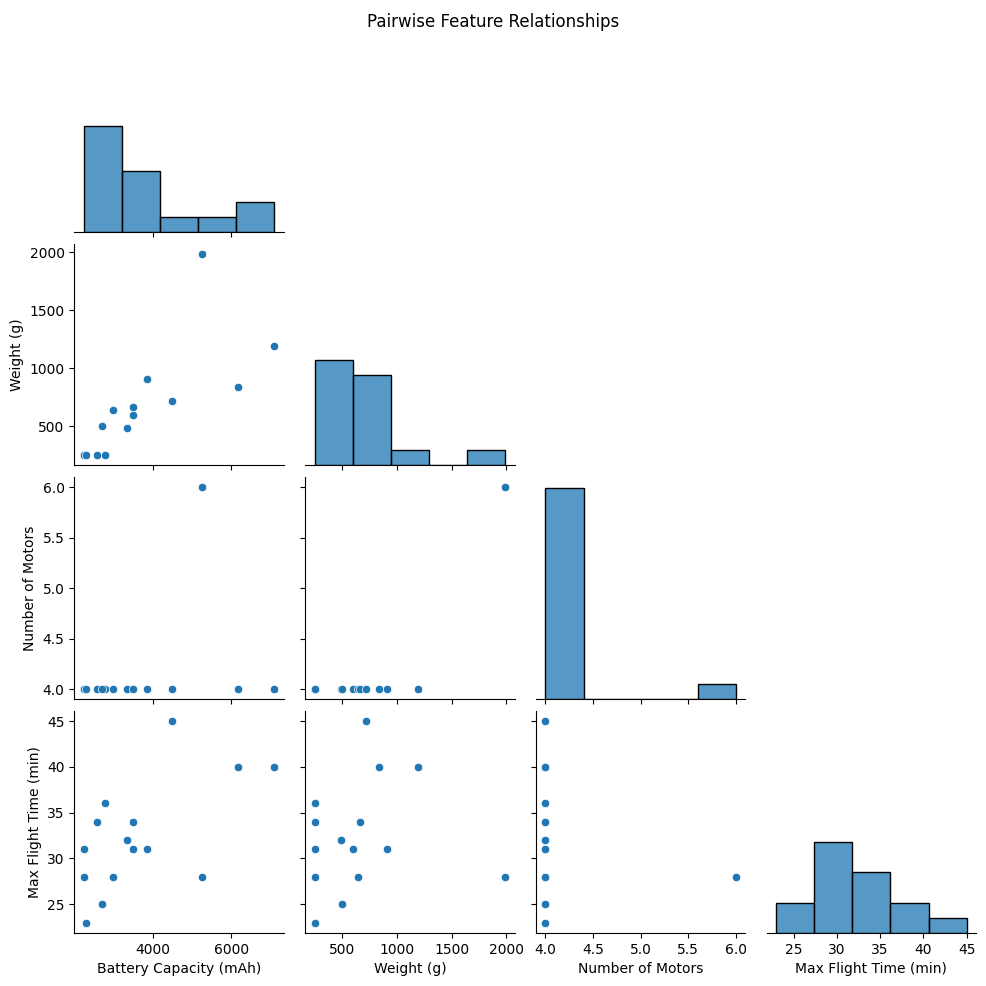

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df["Battery Capacity (mAh)"], kde=True, color="blue")
plt.title("Distribution of Battery Capacity")
plt.xlabel("Battery Capacity (mAh)")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x="Battery Capacity (mAh)", y="Max Flight Time (min)", data=df)
plt.title("Battery Capacity vs Flight Time")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Flight Time (min)")
plt.show()

sns.pairplot(df[['Battery Capacity (mAh)','Weight (g)','Number of Motors','Max Flight Time (min)']], corner=True)
plt.suptitle("Pairwise Feature Relationships")
plt.show()


In [11]:
# Select the features
features = df[['Battery Capacity (mAh)','Weight (g)','Number of Motors']]

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create and fit k-means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

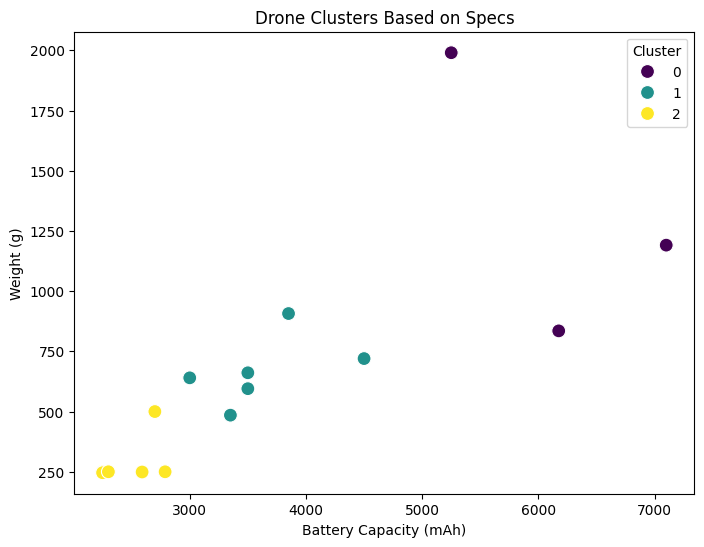

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Battery Capacity (mAh)',
    y='Weight (g)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100
)
plt.title("Drone Clusters Based on Specs")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Weight (g)")
plt.show()

/tmp/ipython-input-361663024.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Max Flight Time (min)", data=df, palette="viridis")


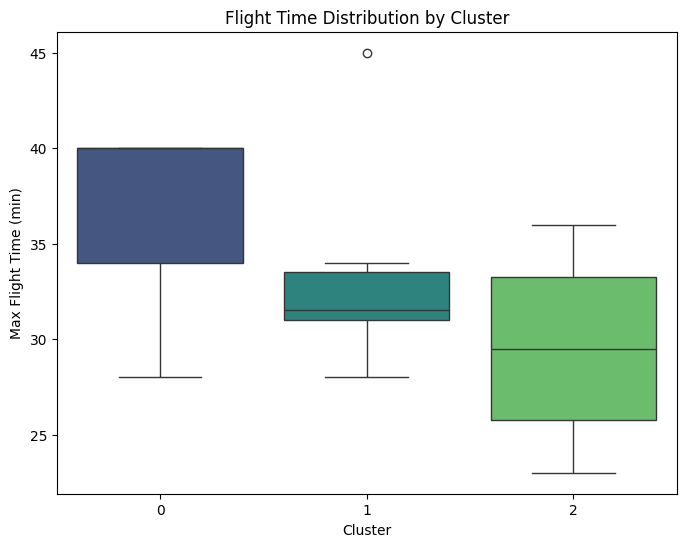

Average Flight Time per Cluster:
   Cluster  Max Flight Time (min)
0        0                   36.0
1        1                   33.5
2        2                   29.5


In [13]:
# Boxplot of flight time by cluster
plt.figure(figsize=(8,6))
sns.boxplot(x="Cluster", y="Max Flight Time (min)", data=df, palette="viridis")
plt.title("Flight Time Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Max Flight Time (min)")
plt.show()

# Also show the average flight time per cluster
cluster_means = df.groupby("Cluster")["Max Flight Time (min)"].mean().reset_index()
print("Average Flight Time per Cluster:")
print(cluster_means)

In [14]:
# Features and target
X = df[['Battery Capacity (mAh)','Weight (g)','Number of Motors']]
y = df['Max Flight Time (min)']

# Train
lr = LinearRegression()
lr.fit(X, y)

# Predict on the same data (small dataset)
y_pred = lr.predict(X)

# Metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print("Linear Regression Performance:")
print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f} minutes")

Linear Regression Performance:
R² score: 0.588
Mean Absolute Error: 2.753 minutes


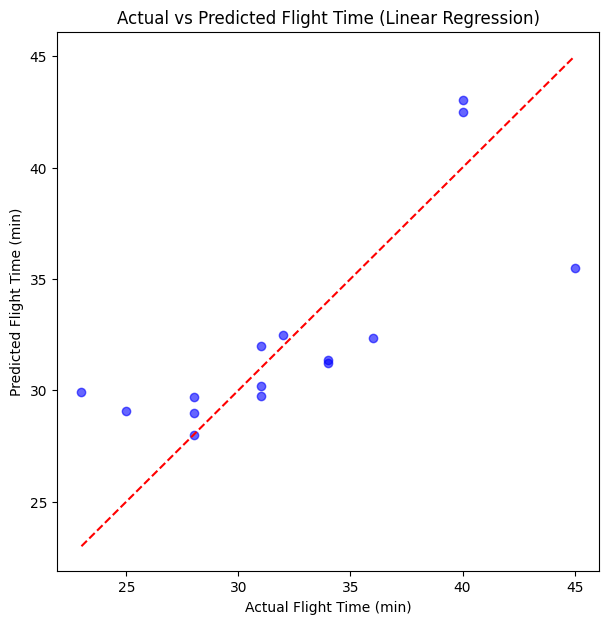

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(y, y_pred, c='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # 45° reference line
plt.xlabel("Actual Flight Time (min)")
plt.ylabel("Predicted Flight Time (min)")
plt.title("Actual vs Predicted Flight Time (Linear Regression)")
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [18]:
# Features and target
X = df[['Battery Capacity (mAh)','Weight (g)','Number of Motors']]
y = df['Max Flight Time (min)']

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Train polynomial regression
poly_lr = make_pipeline(poly, LinearRegression())
poly_lr.fit(X, y)

# Predict
y_poly_pred = poly_lr.predict(X)

# Evaluate
r2_poly = r2_score(y, y_poly_pred)
mae_poly = mean_absolute_error(y, y_poly_pred)

print("Polynomial Regression (degree 2)")
print(f"R² score: {r2_poly:.3f}")
print(f"Mean Absolute Error: {mae_poly:.3f} minutes")

Polynomial Regression (degree 2)
R² score: 0.826
Mean Absolute Error: 1.822 minutes


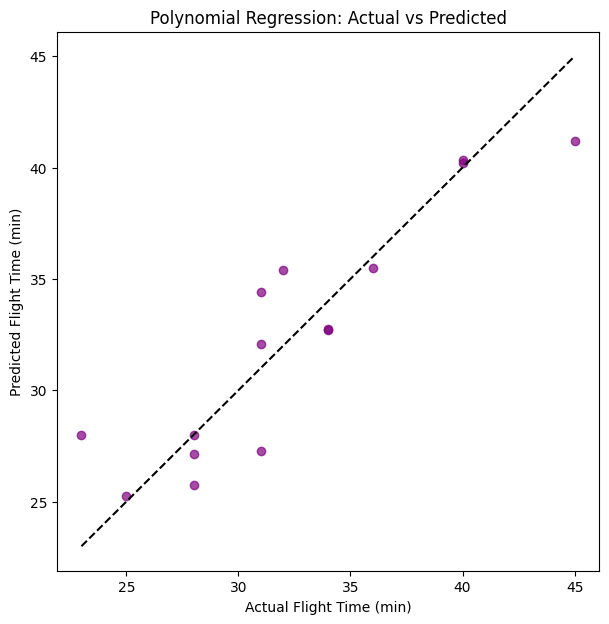

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(y, y_poly_pred, c='purple', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.xlabel("Actual Flight Time (min)")
plt.ylabel("Predicted Flight Time (min)")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()